In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
import seaborn as sns

In [46]:
X_train, X_test, y_train, y_test = load('../../preprocesiranje/classification_data.joblib')

In [47]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train data:')
    model_info(y_train, y_train_pred)
    print('-----------------------------------------------')
    print('Test data:')
    model_info(y_test, y_test_pred)
    
    return model, y_train_pred, y_test_pred

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [49]:
def model_info(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Oranges',
        linewidths=0.5,
        cbar=False,
        square=True,
        xticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
        yticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
    )

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='macro'))
    print('Recall score: ', recall_score(y_real, y_pred, average='macro'))
    print('F1 score: ', f1_score(y_real, y_pred, average='macro'))
    

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
medalje = y_train.value_counts()
print(medalje)

Medal
Gold        25507
Bronze      25409
Silver      25194
No_Medal    18483
Name: count, dtype: int64


Train data:


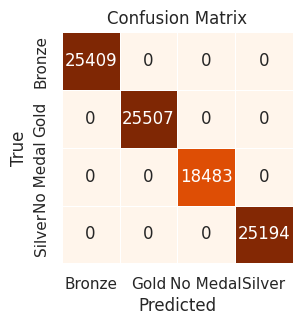

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
-----------------------------------------------
Test data:


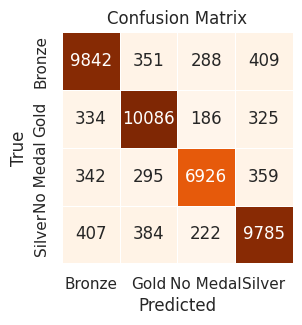

Accuracy score:  0.9037517574800819
Precision score:  0.9041044226606616
Recall score:  0.901730585740576
F1 score:  0.902814724740074


In [52]:
dtc = DecisionTreeClassifier(random_state=22)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

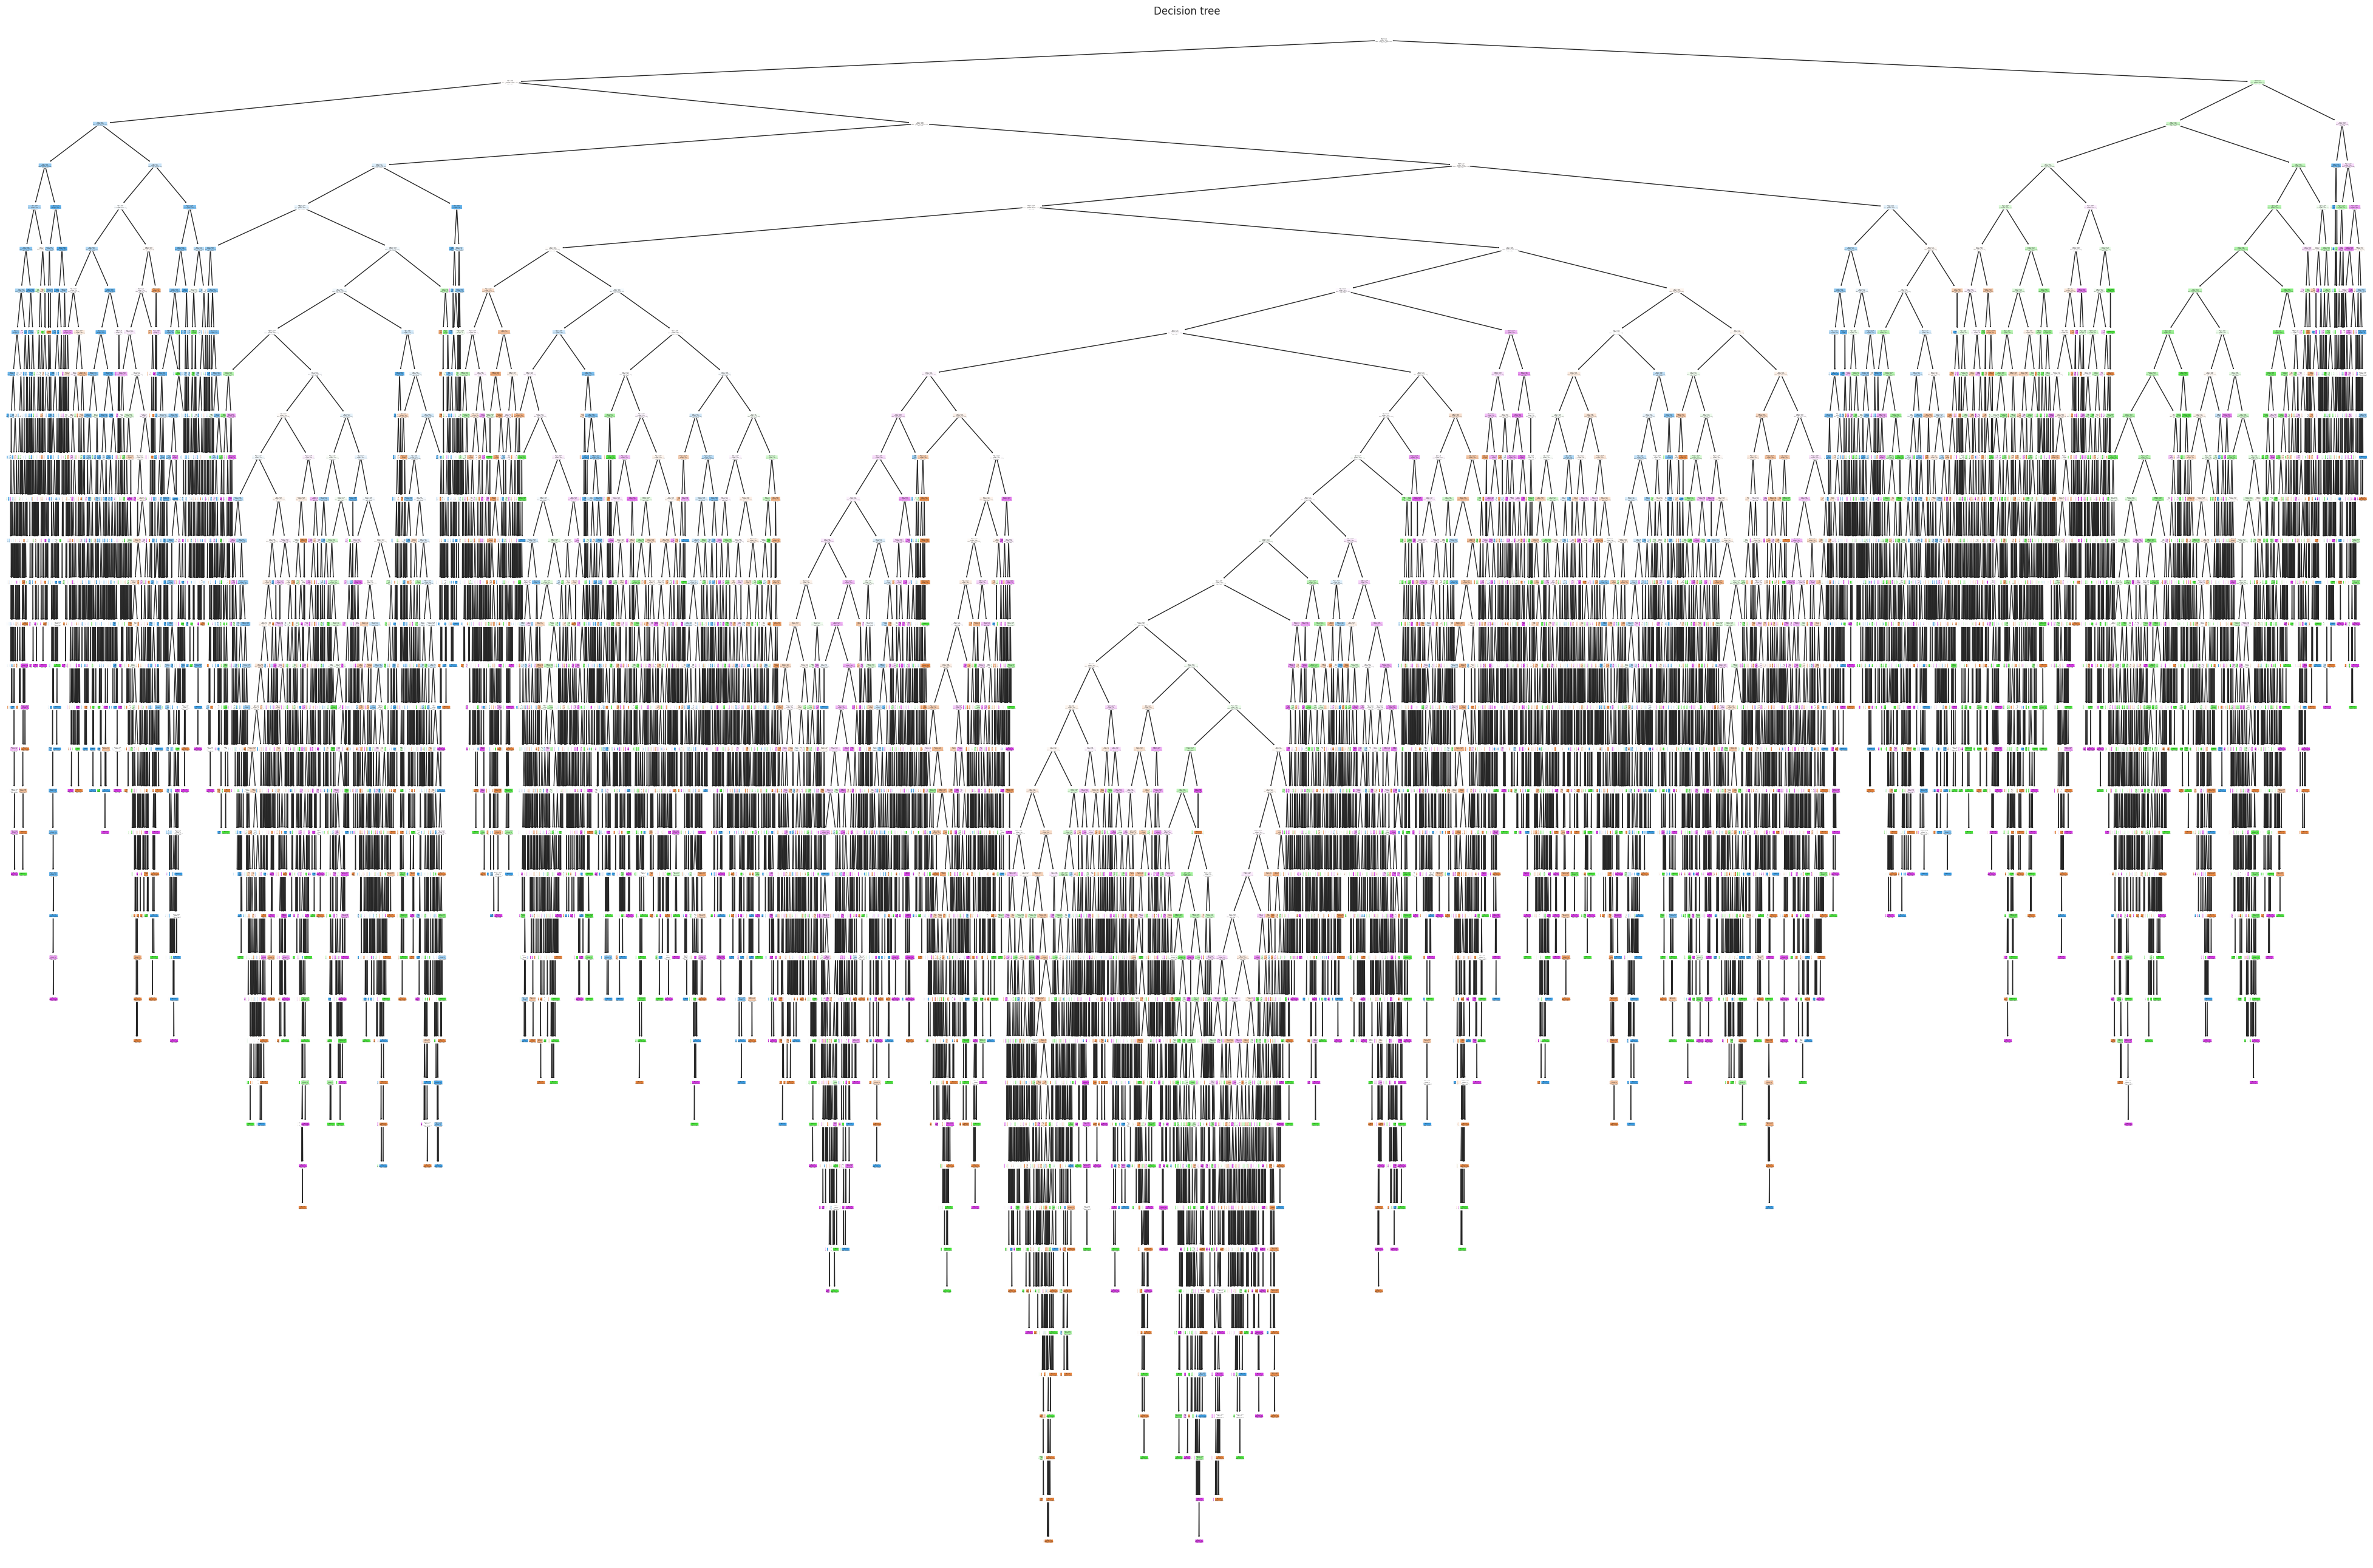

Broj čvorova: 22835, dubina: 36


In [53]:
plt.figure(figsize=(50, 33))
_=plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

num_nodes = dtc_model.tree_.node_count
depth = dtc_model.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

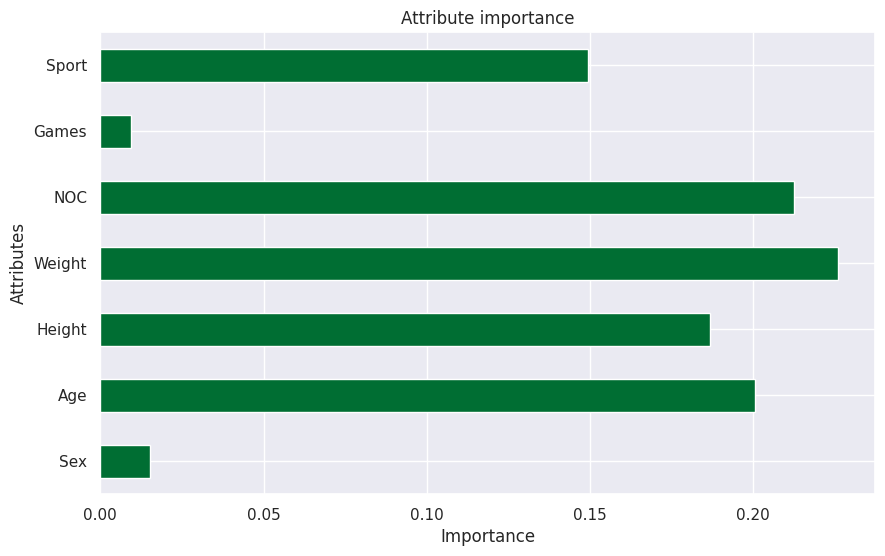

In [10]:
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color='#006E33')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Optimizacija DecisionTree modela

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 25],
    'min_samples_leaf': [1, 2, 3, 5],
    'class_weight': [None, 'balanced']
}

In [13]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 22), param_grid = params, scoring = 'accuracy')

In [14]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 5]},
             scoring='accuracy')

In [15]:
print('Najbolji parametri: ')
estimator_dtc.best_params_

Najbolji parametri: 


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 1}

In [16]:
print('Najbolji rezultat:')
estimator_dtc.best_score_

Najbolji rezultat:


0.8843677863252424

Train data:


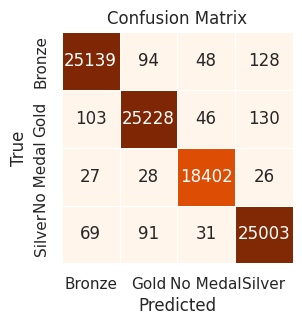

Accuracy score:  0.9913207108348397
Precision score:  0.9914489734816345
Recall score:  0.9916180236263527
F1 score:  0.9915314063170824
-----------------------------------------------
Test data:


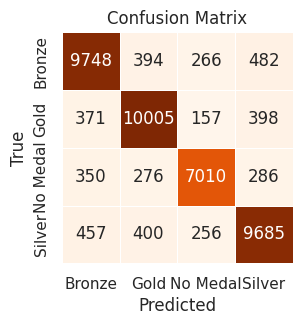

Accuracy score:  0.8990404775412545
Precision score:  0.8999515699598092
Recall score:  0.8980557153526952
F1 score:  0.8989419322958763


In [17]:
best_dtc_model, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

In [18]:
# plt.figure(figsize=(50, 33))
# _=plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
# plt.title("Decision tree")
# plt.show()

# num_nodes = best_model_dtc.tree_.node_count
# depth = best_model_dtc.tree_.max_depth
# print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

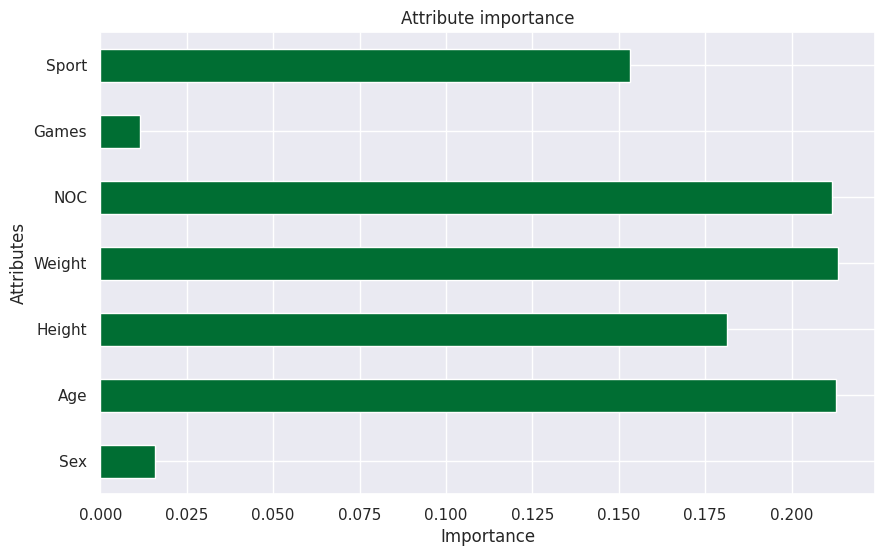

In [19]:
feature_importance = pd.Series(best_dtc_model.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color='#006E33')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Slucajne Sume

In [20]:
from sklearn.ensemble import RandomForestClassifier

Train data:


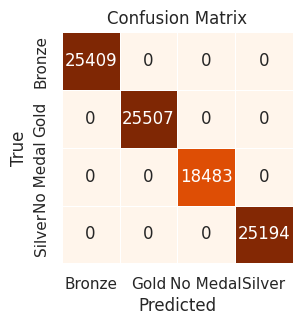

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
-----------------------------------------------
Test data:


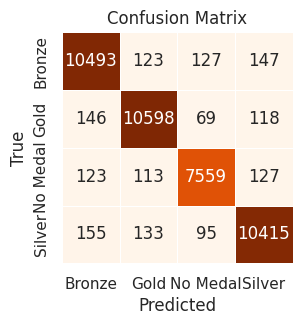

Accuracy score:  0.9635924126193236
Precision score:  0.9635430619185383
Recall score:  0.9629473560494971
F1 score:  0.9632391503328528


In [21]:
rf = RandomForestClassifier()
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

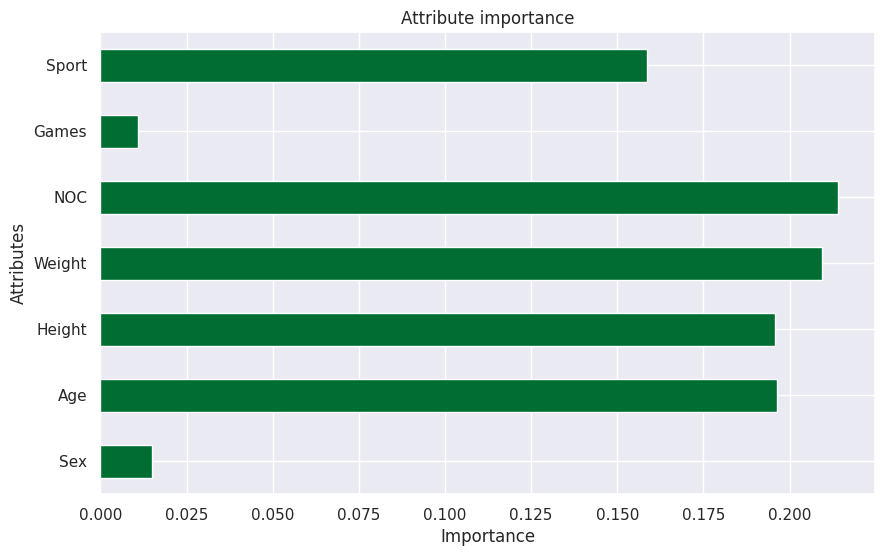

In [22]:
feature_importance = pd.Series(rf_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color='#006E33')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Optimizacija RandomForest modela

In [23]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300]
}

In [24]:
estimator_rf = GridSearchCV(RandomForestClassifier(), param_grid=params)

In [35]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300]})

In [36]:
print('Najbolji parametri: ')
estimator_rf.best_params_

Najbolji parametri: 


{'criterion': 'gini', 'n_estimators': 300}

In [37]:
print('Najbolji rezultat: ')
estimator_rf.best_score_

Najbolji rezultat: 


0.9555041185506816

Train data:


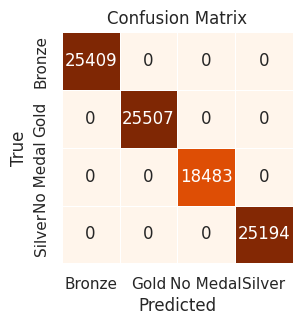

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
-----------------------------------------------
Test data:


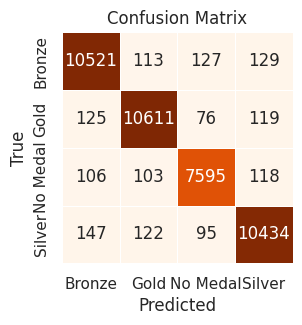

Accuracy score:  0.9659603857822945
Precision score:  0.9657009145755936
Recall score:  0.9654634401766679
F1 score:  0.9655811626081118


In [38]:
best_rf_model, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

In [39]:
import joblib

In [40]:
models = [dtc_model, best_dtc_model, rf_model, best_rf_model]

In [41]:
joblib.dump(models, 'stabla.joblib')

['stabla.joblib']

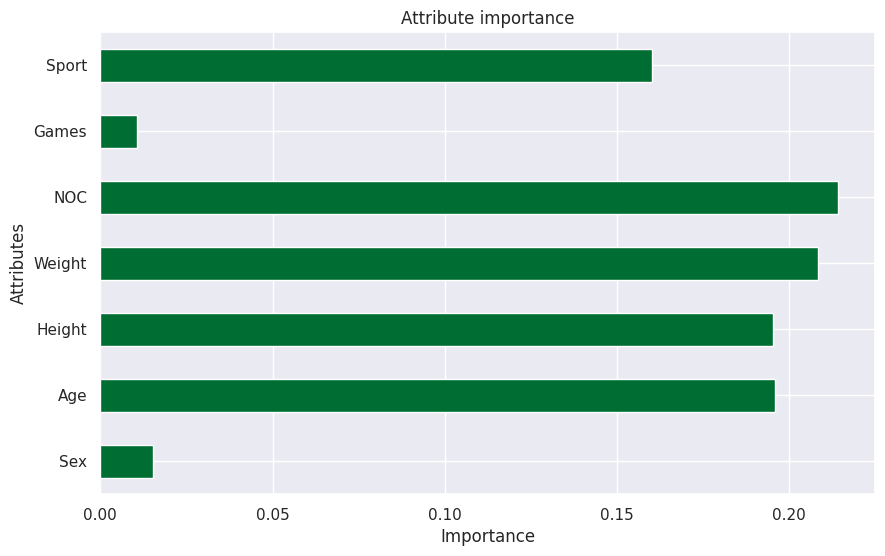

In [42]:
feature_importance = pd.Series(best_rf_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color='#006E33')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Moramo da binarizujemo ciljne vrednosti zato što vršimo višeklasnu klasifikaciju

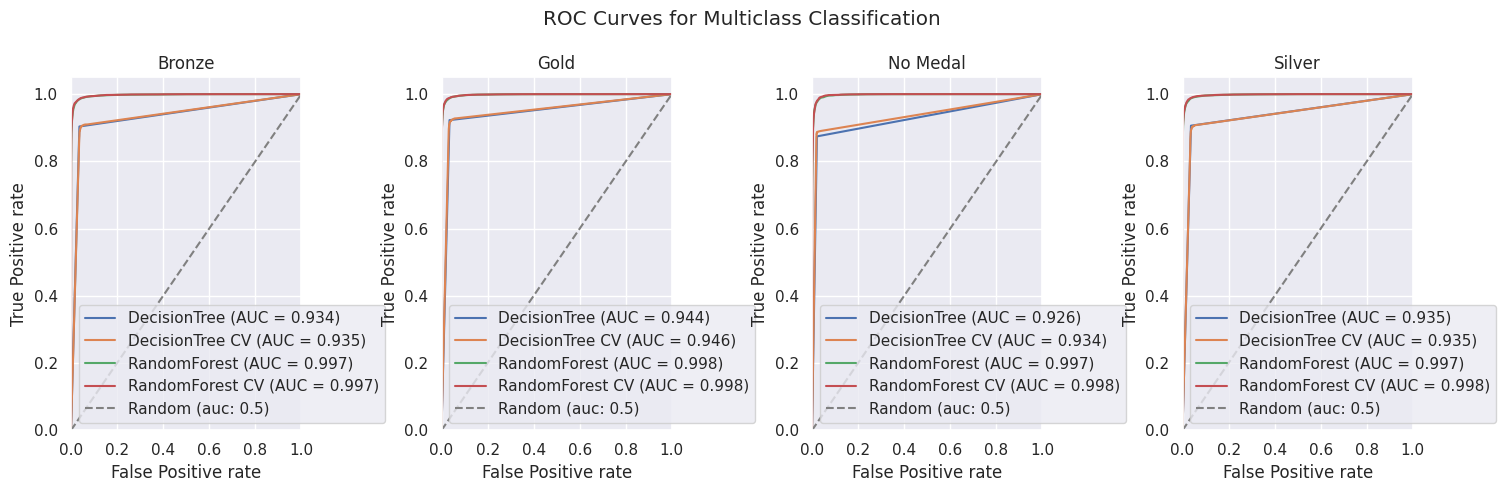

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class_names = ['Bronze', 'Gold', 'No Medal', 'Silver']

y_train_bin = label_binarize(y_train, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])
y_test_bin = label_binarize(y_test, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])

models = [dtc_model, best_dtc_model, rf_model, best_rf_model]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']

plt.figure(figsize = (15, 5))

for class_index in range(y_train_bin.shape[1]):
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(class_names[class_index])
    
    for model, model_name in zip(models, model_names):
        y_pred = model.predict_proba(X_test)
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index],  y_pred[:, class_index])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

## Eksportovanje modela

In [44]:
joblib.dump(models, 'stabla.joblib')

['stabla.joblib']